# Regression with a Flood Prediction Dataset
## Competition Kaggle
### Задачи:
- Знакомство с данными
    1. Nan значений НЕТ
    2. 
- Построение графиков
- Посторение моделей

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import optuna

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor

## Загрузка данных

In [2]:
# Снятие ограничений по колонкам
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/train.csv')
df_pred = pd.read_csv('data/test.csv')
original_df = pd.read_csv('data/flood.csv')

## Просмотр данных

In [21]:
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,-0.809681
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,-0.798508
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,-0.634878
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,-0.625489
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,-0.879477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4,-0.703198
1117953,1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5,-0.733969
1117954,1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4,-0.723606
1117955,1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4,-0.703198


In [9]:
df_pred

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,7,6,6,8,6,2,3,8,7,5,5


In [6]:
original_df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,4,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,8,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,7,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,5,6,3,4,7,6,2,4,0,11,0.515


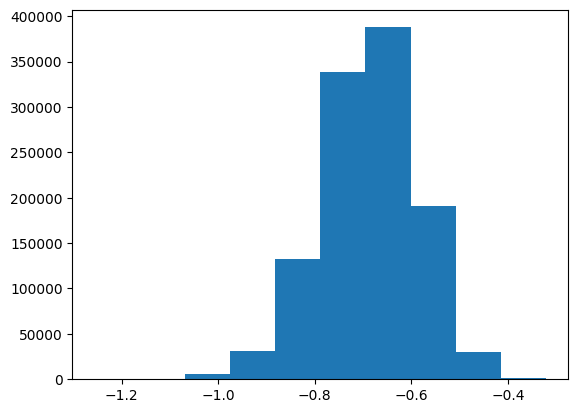

In [5]:
plt.hist(df.FloodProbability, bins=10);

## Подготовка данных

In [4]:
# Удаляю id
df.drop(columns='id', inplace=True)
df_pred.drop(columns='id', inplace=True)

In [5]:
# df_all = pd.concat([df, original_df], ignore_index=True)

## Модели:

### catboost

In [5]:
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# def objective(trial: optuna.Trial):
#     '''
#     Обычная сигнатура функции оптимизации для optuna.
#     '''
#     params = {
#         'random_seed': 42,
#         'verbose': 0,
#         'eval_metric': 'R2',
#         'iterations': trial.suggest_int('iterations', 1000, 2100),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
#         'depth': trial.suggest_int('depth', 3, 12),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
#         # 'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
#         # 'random_strength': trial.suggest_float("random_strength", 1e-8, 10.0, log=True)
#     }
    
#     model = CatBoostRegressor(**params)
#     model.fit(X_train, y_train, eval_set=(X_test, y_test))
#     predictions = model.predict(X_test)
#     return r2_score(y_test, predictions)
    
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

[I 2024-05-01 16:42:14,633] A new study created in memory with name: no-name-b9dec748-388e-4a3f-984e-feb8dfd841ea
[I 2024-05-01 16:47:29,991] Trial 0 finished with value: 0.5762865802924124 and parameters: {'iterations': 1137, 'learning_rate': 0.002297275365054116, 'depth': 10, 'l2_leaf_reg': 9.374851825523974}. Best is trial 0 with value: 0.5762865802924124.
[I 2024-05-01 16:50:11,377] Trial 1 finished with value: 0.5133625829926387 and parameters: {'iterations': 1111, 'learning_rate': 0.002627062147558106, 'depth': 7, 'l2_leaf_reg': 4.847651452754534e-06}. Best is trial 0 with value: 0.5762865802924124.
[I 2024-05-01 16:52:53,422] Trial 2 finished with value: 0.8412589234021333 and parameters: {'iterations': 1254, 'learning_rate': 0.024500128547784057, 'depth': 6, 'l2_leaf_reg': 0.0005041186043953092}. Best is trial 2 with value: 0.8412589234021333.
[I 2024-05-01 16:54:55,523] Trial 3 finished with value: 0.8453333658940767 and parameters: {'iterations': 1447, 'learning_rate': 0.0701

In [8]:
# study.best_params

{'iterations': 1498,
 'learning_rate': 0.06715518880782499,
 'depth': 11,
 'l2_leaf_reg': 1.7801302641717838}

In [6]:
best_params = {'random_seed': 42,
               'verbose': 0,
               'eval_metric': 'R2',
               'iterations': 1498,
               'learning_rate': 0.06715518880782499,
               'depth': 11,
               'l2_leaf_reg': 1.7801302641717838}
# score test: 0.8477649344796935
# score kaggle: 

In [7]:
cat_model = CatBoostRegressor(**best_params)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)
r2score_cat = r2_score(y_test, y_pred_cat)
r2score_cat

0.8477649344796935

In [ ]:
# cat_model = CatBoostRegressor(**best_params)
# cat_model.fit(X, y)

pred = cat_model.predict(df_pred)

In [9]:
df_pred_duble = pd.read_csv('data/test.csv')
df_pred_Id = df_pred_duble['id']

output = pd.DataFrame({'id': df_pred_Id, 'FloodProbability': pred})
output.to_csv('data/cat_model.csv', index=False)

### lgbm

In [5]:
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# def objective(trial: optuna.Trial):
#     '''
#     Обычная сигнатура функции оптимизации для optuna.
#     '''
#     param = {
#             "metric": 'R2',
#             "verbosity": -1,
#             "boosting_type": "gbdt",
#             "random_state": 42,
#             "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
#             "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#             'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
#             'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
#             "max_depth": trial.suggest_int("max_depth", 5, 25),
# #            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
# #            "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#             "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
#             'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
#             'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0)}
    
#     lgbm_model = LGBMRegressor(**param)
#     lgbm_model.fit(X_train, y_train, eval_set=(X_test, y_test))
#     y_pred = lgbm_model.predict(X_test)
#     return r2_score(y_test, y_pred)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

[I 2024-05-06 14:30:14,752] A new study created in memory with name: no-name-a8196c6e-e916-4be3-b348-c3c98a8b830c
[I 2024-05-06 14:31:39,895] Trial 0 finished with value: 0.8406248007090955 and parameters: {'learning_rate': 0.04386268921095271, 'n_estimators': 918, 'lambda_l1': 0.06902882583743432, 'lambda_l2': 2.7171525858462834e-05, 'max_depth': 17, 'min_child_samples': 15, 'feature_fraction': 0.9716062708934595, 'bagging_fraction': 0.8120297553586594}. Best is trial 0 with value: 0.8406248007090955.
[I 2024-05-06 14:32:07,237] Trial 1 finished with value: 0.7960861757118187 and parameters: {'learning_rate': 0.03428110673063043, 'n_estimators': 375, 'lambda_l1': 3.020407631021095e-05, 'lambda_l2': 0.021506002855359037, 'max_depth': 7, 'min_child_samples': 46, 'feature_fraction': 0.6978150248280073, 'bagging_fraction': 0.9731869734903006}. Best is trial 0 with value: 0.8406248007090955.
[I 2024-05-06 14:32:17,581] Trial 2 finished with value: 0.7674028272831283 and parameters: {'learn

In [7]:
# study.best_params

{'learning_rate': 0.04267423467176455,
 'n_estimators': 998,
 'lambda_l1': 1.0058562181737075e-08,
 'lambda_l2': 5.572970804653375,
 'max_depth': 21,
 'min_child_samples': 18,
 'feature_fraction': 0.841233081764558,
 'bagging_fraction': 0.8761104983674854}

In [8]:
best_params = {
    "metric": 'R2',
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    'learning_rate': 0.04267423467176455,
    'n_estimators': 998,
    'lambda_l1': 1.0058562181737075e-08,
    'lambda_l2': 5.572970804653375,
    'max_depth': 21,
    'min_child_samples': 18,
    'feature_fraction': 0.841233081764558,
    'bagging_fraction': 0.8761104983674854
}

# score test: 0.8410839541952768
# score kaggle test: 0.84073
# score kaggle full: 0.84136

In [9]:
lgbm_model = LGBMRegressor(**best_params)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
r2_lgbm

0.8410839541952768

In [12]:
lgbm_model = LGBMRegressor(**best_params)
lgbm_model.fit(X, y)

pred = lgbm_model.predict(df_pred)

In [13]:
df_pred_duble = pd.read_csv('data/test.csv')
df_pred_Id = df_pred_duble['id']

output = pd.DataFrame({'id': df_pred_Id, 'FloodProbability': pred})
output.to_csv('data/lgbm_model.csv', index=False)

### XGBoost

In [5]:
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# def objective(trial: optuna.Trial):
#     '''
#     Обычная сигнатура функции оптимизации для optuna.
#     '''
#     param = {
#         'eval_metric': 'rmse',
#         'use_label_encoder': False,
#         'random_state': 42,
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0)}

    
#     xgbr_model = XGBRegressor(**param)
#     xgbr_model.fit(X_train, y_train)
#     y_pred = xgbr_model.predict(X_test)
#     return r2_score(y_test, y_pred)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)

[I 2024-05-06 17:40:15,015] A new study created in memory with name: no-name-73ec2b8c-a327-4b8b-a7ce-44bb5d3e59ec
[I 2024-05-06 17:40:45,717] Trial 0 finished with value: 0.8048003642663225 and parameters: {'max_depth': 14, 'learning_rate': 0.14050864975657348, 'n_estimators': 686, 'min_child_weight': 1, 'gamma': 0.32064629411394335, 'subsample': 0.5020426707327509, 'colsample_bytree': 0.9423229829556841, 'reg_alpha': 0.4962925831848968, 'reg_lambda': 0.4407083332158137}. Best is trial 0 with value: 0.8048003642663225.
[I 2024-05-06 17:40:59,497] Trial 1 finished with value: 0.7206605874508621 and parameters: {'max_depth': 8, 'learning_rate': 0.2966000993845422, 'n_estimators': 374, 'min_child_weight': 9, 'gamma': 0.568209241059557, 'subsample': 0.11470271093754557, 'colsample_bytree': 0.707130117412192, 'reg_alpha': 0.4335078531126197, 'reg_lambda': 0.03026677068378437}. Best is trial 0 with value: 0.8048003642663225.
[I 2024-05-06 17:41:11,726] Trial 2 finished with value: 0.70778850

In [9]:
# study.best_params

{'max_depth': 9,
 'learning_rate': 0.8472487450322445,
 'n_estimators': 603,
 'min_child_weight': 2,
 'gamma': 0.000605797605256695,
 'subsample': 0.7538618508364402,
 'colsample_bytree': 0.07179130792340982,
 'reg_alpha': 0.5002004024869536,
 'reg_lambda': 0.27763193395884594}

In [10]:
params= {
    'max_depth': 9,
    'learning_rate': 0.8472487450322445,
    'n_estimators': 603,
    'min_child_weight': 2,
    'gamma': 0.000605797605256695,
    'subsample': 0.7538618508364402,
    'colsample_bytree': 0.07179130792340982,
    'reg_alpha': 0.5002004024869536,
    'reg_lambda': 0.27763193395884594
}

# score test: 0.8454460753259425
# score kaggle test: 0.84518
# score kaggle full: 0.84519

In [11]:
xgbr_model = XGBRegressor(**params)
xgbr_model.fit(X_train, y_train)

y_pred_xgbr = xgbr_model.predict(X_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
r2_xgbr

0.8454460753259425

In [14]:
xgbr_model = XGBRegressor(**params)
xgbr_model.fit(X, y)

pred = xgbr_model.predict(df_pred)

In [15]:
df_pred_duble = pd.read_csv('data/test.csv')
df_pred_Id = df_pred_duble['id']

output = pd.DataFrame({'id': df_pred_Id, 'FloodProbability': pred})
output.to_csv('data/xgbr_model.csv', index=False)